In [2]:
# import libraries
import numpy as np
import pandas as pd import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the dataset and prtint firs 5 rows.
df = pd.read_csv('D:/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
# checking the null values and data type of columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
# get sum of missing values.
df.isna().sum().sum()

0

In [6]:
# checking  on sum of duplicates value
df.duplicated().sum()

0

In [25]:
# get summary statistical
df.describe().round(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0
mean,65.00,36.01,55000.00,180.00,499.50,486.32,0.48,115.41,499.50,0.5
std,15.85,8.79,13414.63,43.90,288.82,279.31,0.50,69.94,288.82,0.5
min,32.60,19.00,13996.50,104.78,0.00,0.00,0.00,0.00,0.00,0.0
25%,51.36,29.00,47031.80,138.83,249.75,246.75,0.00,54.00,249.75,0.0
50%,68.22,35.00,57012.30,183.13,499.50,484.50,0.00,113.50,499.50,0.5
75%,78.55,42.00,65470.63,218.79,749.25,727.25,1.00,177.00,749.25,1.0
max,91.43,61.00,79484.80,269.96,999.00,968.00,1.00,236.00,999.00,1.0


### Handle categorical data

In [10]:
or_encoder = OrdinalEncoder()
for column in df.columns:
    if df[column].dtype =="O":
        df[column] = or_encoder.fit_transform(df[[column]])

In [26]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,91.0,961.0,0,215.0,439.0,0
1,80.23,31,68441.85,193.77,464.0,903.0,1,147.0,474.0,0
2,69.47,26,59785.94,236.50,566.0,111.0,0,184.0,367.0,0
3,74.15,29,54806.18,245.89,903.0,939.0,1,103.0,56.0,0
4,68.37,35,73889.99,225.58,766.0,805.0,0,96.0,767.0,0


### Some use of visualization techniques

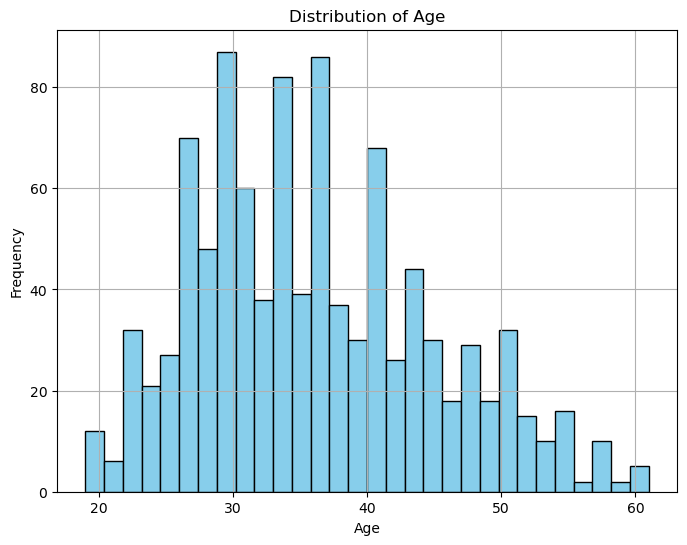

In [11]:
plt.figure(figsize=(8,6))
plt.hist(df['Age'] , bins=30 , color='skyblue' , edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

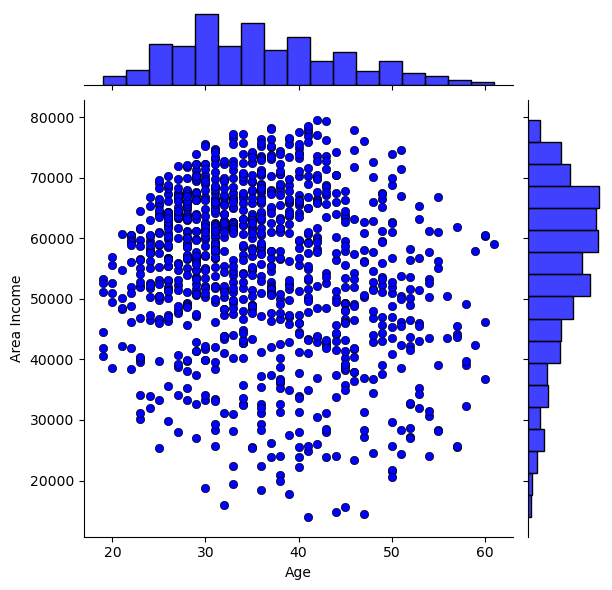

In [12]:
sns.jointplot(x='Age' , y='Area Income' , data=df , kind='scatter' , color='blue' , edgecolor='black')
plt.show()

#### classify data into feature and label

In [13]:
x = df.drop(columns = ['Clicked on Ad'])
y = df['Clicked on Ad']

# split data

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state = 42)

### model_1 -----> LogisticRegression()

In [15]:
le = LogisticRegression()
le.fit(x_train , y_train)
y_pred = le.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       146
           1       0.96      0.84      0.90       154

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



### model_2 -----> GaussianNB()

In [16]:
g_model = GaussianNB()
g_model.fit(x_train , y_train)
y_pred_1 = le.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       146
           1       0.96      0.84      0.90       154

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



### model_3 -----> KNeighborsClassifier()

In [17]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train , y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       146
           1       0.67      0.60      0.63       154

    accuracy                           0.64       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.64      0.64      0.64       300



### model_4 -----> DecisionTreeClassifier()

In [18]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train , y_train)
y_pred = dt_model.predict(x_test)
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       147
           1       0.92      0.93      0.93       153

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### model_5 ----->RandomForestClassifier()

In [19]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train , y_train)
y_pred = rf_model.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       146
           1       0.95      0.94      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



### Enhance model performance 

In [20]:
# Initialize the classifier
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': list(range(1,100)),
    'max_depth': [10, 20, 30, None],
    
}
rf_model.set_params(**param_grid)


RandomForestClassifier(max_depth=[10, 20, 30, None],
                       n_estimators=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                     14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                     25, 26, 27, 28, 29, 30, ...])

In [21]:
gs = GridSearchCV(rf_model , param_grid , cv = 5)
gs.fit(x_train , y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=[10, 20, 30, None],
                                              n_estimators=[1, 2, 3, 4, 5, 6, 7,
                                                            8, 9, 10, 11, 12,
                                                            13, 14, 15, 16, 17,
                                                            18, 19, 20, 21, 22,
                                                            23, 24, 25, 26, 27,
                                                            28, 29, 30, ...]),
             param_grid={'max_depth': [10, 20, 30, None],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [22]:
# Best parameters
best_params = gs.best_params_
print(f'best_params is {best_params}')

best_params is {'max_depth': 20, 'n_estimators': 57}


In [23]:
# Best Estimator
best_estimaator = gs.best_estimator_
print(f'best_estimaator is {best_estimaator}')

best_estimaator is RandomForestClassifier(max_depth=20, n_estimators=57)


In [24]:
# Best score
best_score = gs.best_score_
print(f'best_score is {best_score}')

best_score is 0.9685714285714286


#### Model after parameter optimization 

In [27]:
rf_model = RandomForestClassifier(max_depth = 20 , n_estimators = 57)
rf_model.fit(x_train , y_train)
y_pred = rf_model.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       146
           1       0.97      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

